In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.colors as mcolors


small_size = 10
medium_size = 12
bigger_size = 14

plt.rc('font', size=bigger_size)          # controls default text sizes
plt.rc('axes', titlesize=bigger_size)     # fontsize of the axes title
plt.rc('axes', labelsize=bigger_size)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=bigger_size)    # fontsize of the tick labels
plt.rc('ytick', labelsize=bigger_size)    # fontsize of the tick labels
plt.rc('legend', fontsize=bigger_size)    # legend fontsize
plt.rc('figure', titlesize=bigger_size)   # fontsize of the figure title

plt.rcParams["figure.figsize"] = (16,8)   # figure size

import csv
import requests
from datetime import datetime

#plt.style.use('ggplot')

### Importing Data

We import data from https://ourworldindata.org/. This file comes with extensive data.

In [2]:
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
r = requests.get(url, allow_redirects=True)
url_content = r.content
csv_file = open('owid-covid-data.csv', 'wb')
csv_file.write(url_content)
csv_file.close()

In [3]:
df_raw = pd.read_csv (r'owid-covid-data.csv')
df_raw

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120122,ZWE,Africa,Zimbabwe,2021-09-25,129505.0,371.0,252.286,4603.0,3.0,5.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
120123,ZWE,Africa,Zimbabwe,2021-09-26,129625.0,120.0,241.000,4604.0,1.0,5.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
120124,ZWE,Africa,Zimbabwe,2021-09-27,129919.0,294.0,247.571,4607.0,3.0,5.429,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
120125,ZWE,Africa,Zimbabwe,2021-09-28,130272.0,353.0,298.000,4615.0,8.0,6.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


Here df_raw presents columns 'continent' and 'location'. For countries 'continent' isn't null but location can also be a continent or the entire world, in these cases the column 'continent' is null.
df becomes the data base with countries only (without continents and world values).

In [4]:
df = df_raw[df_raw['continent'].notnull()]
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120122,ZWE,Africa,Zimbabwe,2021-09-25,129505.0,371.0,252.286,4603.0,3.0,5.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
120123,ZWE,Africa,Zimbabwe,2021-09-26,129625.0,120.0,241.000,4604.0,1.0,5.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
120124,ZWE,Africa,Zimbabwe,2021-09-27,129919.0,294.0,247.571,4607.0,3.0,5.429,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
120125,ZWE,Africa,Zimbabwe,2021-09-28,130272.0,353.0,298.000,4615.0,8.0,6.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


### Checking how much data is missing

In [5]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())#False is 0, True is 1
    print('{} - {}%'.format(col, round(pct_missing*100)))

iso_code - 0%
continent - 0%
location - 0%
date - 0%
total_cases - 5%
new_cases - 5%
new_cases_smoothed - 6%
total_deaths - 14%
new_deaths - 14%
new_deaths_smoothed - 6%
total_cases_per_million - 5%
new_cases_per_million - 5%
new_cases_smoothed_per_million - 6%
total_deaths_per_million - 14%
new_deaths_per_million - 14%
new_deaths_smoothed_per_million - 6%
reproduction_rate - 16%
icu_patients - 88%
icu_patients_per_million - 88%
hosp_patients - 86%
hosp_patients_per_million - 86%
weekly_icu_admissions - 99%
weekly_icu_admissions_per_million - 99%
weekly_hosp_admissions - 98%
weekly_hosp_admissions_per_million - 98%
new_tests - 55%
total_tests - 55%
total_tests_per_thousand - 55%
new_tests_per_thousand - 55%
new_tests_smoothed - 46%
new_tests_smoothed_per_thousand - 46%
positive_rate - 49%
tests_per_case - 50%
tests_units - 45%
total_vaccinations - 78%
people_vaccinated - 79%
people_fully_vaccinated - 82%
total_boosters - 99%
new_vaccinations - 82%
new_vaccinations_smoothed - 60%
total_

### Current  Death Rate in % per Country

In [6]:
death_rate=(df.groupby(['location'])['total_deaths'].max()/df.groupby(['location'])['total_cases'].max())*100
death_rate.sort_values(ascending=False)

location
Vanuatu                     25.000000
Yemen                       18.973338
Peru                         9.165014
Sudan                        7.585305
Mexico                       7.577102
                              ...    
Turkmenistan                      NaN
Turks and Caicos Islands          NaN
Tuvalu                            NaN
Vatican                           NaN
Wallis and Futuna                 NaN
Length: 224, dtype: float64

### Current Cases per Country

In [7]:
highest_infection_count = df.groupby(['location'])['total_cases'].max()
highest_infection_count

location
Afghanistan          155128.0
Albania              169462.0
Algeria              203198.0
Andorra               15209.0
Angola                56583.0
                       ...   
Vietnam              779398.0
Wallis and Futuna         NaN
Yemen                  9039.0
Zambia               209002.0
Zimbabwe             130485.0
Name: total_cases, Length: 224, dtype: float64

### Infection Rate Percentage  per Country

In [8]:
infection_rate=(df.groupby(['location'])['total_cases'].max()/df.groupby(['location'])['population'].max())*100
infection_rate
infection_rate.sort_values(ascending=False)

location
Seychelles                  21.709635
Montenegro                  20.861363
Andorra                     19.661556
San Marino                  15.989415
Czechia                     15.765300
                              ...    
Tonga                             NaN
Turkmenistan                      NaN
Turks and Caicos Islands          NaN
Tuvalu                            NaN
Wallis and Futuna                 NaN
Length: 224, dtype: float64

### Highest Death Count per County

In [9]:
highest_death_count = df.groupby(['location'])['total_deaths'].max()
highest_death_count.sort_values(ascending=False)

location
United States               695114.0
Brazil                      596122.0
India                       448062.0
Mexico                      276973.0
Russia                      202700.0
                              ...   
Turkmenistan                     NaN
Turks and Caicos Islands         NaN
Tuvalu                           NaN
Vatican                          NaN
Wallis and Futuna                NaN
Name: total_deaths, Length: 224, dtype: float64

### Death Rate Percentage per Country

In [10]:
death_rate=(highest_death_count/highest_infection_count)*100
death_rate.sort_values(ascending=False)

location
Vanuatu                     25.000000
Yemen                       18.973338
Peru                         9.165014
Sudan                        7.585305
Mexico                       7.577102
                              ...    
Turkmenistan                      NaN
Turks and Caicos Islands          NaN
Tuvalu                            NaN
Vatican                           NaN
Wallis and Futuna                 NaN
Length: 224, dtype: float64

### Database with continents only

dc now becomes the database for continents and wold.

In [11]:
dc = df_raw[df_raw['continent'].isnull()]
dc

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
584,OWID_AFR,NaN,Africa,2020-02-13,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
585,OWID_AFR,NaN,Africa,2020-02-14,1.0,1.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
586,OWID_AFR,NaN,Africa,2020-02-15,1.0,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
587,OWID_AFR,NaN,Africa,2020-02-16,1.0,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
588,OWID_AFR,NaN,Africa,2020-02-17,1.0,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118464,OWID_WRL,NaN,World,2021-09-25,231515976.0,363483.0,475209.714,4743196.0,5292.0,8145.714,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
118465,OWID_WRL,NaN,World,2021-09-26,231846936.0,330960.0,471436.429,4748335.0,5139.0,8019.857,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
118466,OWID_WRL,NaN,World,2021-09-27,232335077.0,488141.0,463821.286,4756130.0,7795.0,7968.000,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
118467,OWID_WRL,NaN,World,2021-09-28,232782042.0,446965.0,460793.286,4765112.0,8982.0,7969.571,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN


### Infection Rate per continent 

In [12]:
((dc.groupby(['location'])['total_cases'].max()/dc.groupby(['location'])['population'].max())*100).sort_values(ascending=False)

location
North America     8.739200
South America     8.690227
European Union    8.467226
Europe            7.928781
World             2.961980
Asia              1.616324
Africa            0.602313
Oceania           0.417150
International          NaN
dtype: float64

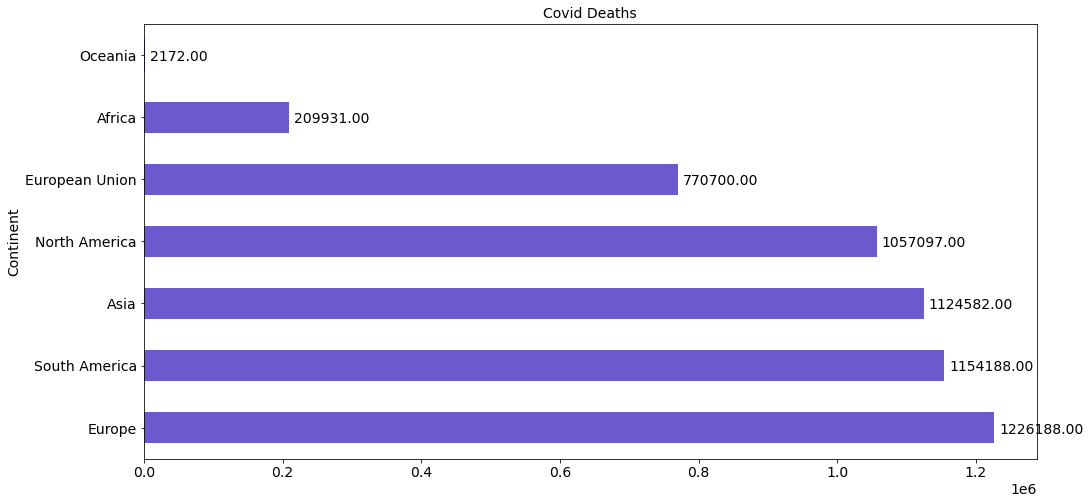

In [13]:
ax = dc.groupby(['location'])['total_deaths'].max().sort_values(ascending=False).drop(labels=['World','International']).plot.barh(xlabel='Continent',ylabel='Deaths', title= 'Covid Deaths', color = 'slateblue' )
for p in ax.patches:
    ax.annotate("%.2f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()), xytext=(5, 10), textcoords='offset points')

<AxesSubplot:ylabel='Covid Cases'>

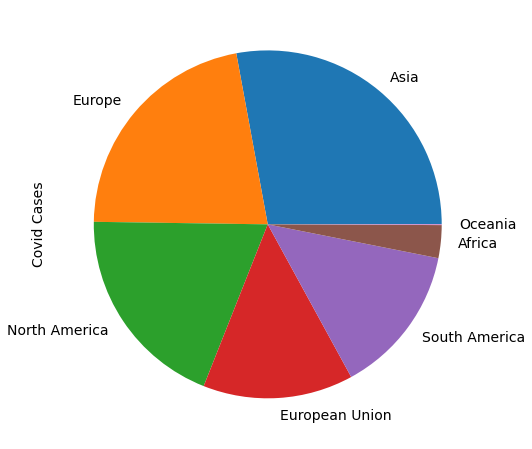

In [14]:
dc.groupby(['location'])['total_cases'].max().sort_values(ascending=False).drop(labels=['World', 'International']).plot.pie( ylabel='Covid Cases')


### Let's visualize on Power BI!

Saving files in excel with world and Portuguese data to visualize on Power BI.

In [24]:
portugal= df.loc[df['location'] == 'Portugal', ['total_deaths', 'date', 'new_cases', 'total_cases' ,'new_deaths', 'people_vaccinated', 'people_fully_vaccinated','icu_patients']]
portugal.fillna(0).set_index('date').to_excel('portugal_info.xlsx', encoding='UTF8')

In [16]:
north_america = dc.loc[dc['location'] == 'North America', ['total_deaths', 'date', 'new_cases', 'total_cases' ,'new_deaths', 'people_vaccinated', 'people_fully_vaccinated','icu_patients']]
north_america.fillna(0).set_index('date').to_excel('north_america.xlsx', encoding='UTF8')

In [17]:
asia= dc.loc[dc['location'] == 'Asia', ['total_deaths', 'date', 'new_cases', 'total_cases' ,'new_deaths', 'people_vaccinated', 'people_fully_vaccinated','icu_patients']]
asia.fillna(0).set_index('date').to_excel('asia.xlsx', encoding='UTF8')

In [18]:
europe=dc.loc[dc['location'] == 'World', ['total_deaths', 'date', 'new_cases', 'total_cases' ,'new_deaths', 'people_vaccinated', 'people_fully_vaccinated']]
europe.fillna(0).set_index('date').to_excel('europe.xlsx', encoding='UTF8')

In [19]:
world = dc.loc[dc['location'] == 'World', ['total_deaths', 'date', 'new_cases', 'total_cases' ,'new_deaths', 'people_vaccinated', 'people_fully_vaccinated']]
world.fillna(0).set_index('date').to_excel('world.xlsx', encoding='UTF8')

In [20]:
case_count = df.groupby(['location'])['total_cases'].max()
case_count.to_excel('cases.xlsx', encoding='UTF8')

In [21]:
death_count = df.groupby(['location'])['total_deaths'].max()
death_count.to_excel('death_world.xlsx', encoding='UTF8')

In [22]:
infection_rate=(df.groupby(['location'])['total_cases'].max()/df.groupby(['location'])['population'].max())*100
infection_rate.to_excel('infection_world.xlsx', encoding='UTF8')